<a href="https://colab.research.google.com/github/hyxxnii/Tave-6th-Project/blob/master/NIPA%20%EC%98%88%EC%84%A0%20-%20%EC%8B%9D%EB%AC%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%2C%20%EB%B3%91%EC%B6%A9%ED%95%B4%20%EB%B6%84%EB%A5%98_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import numpy as np
import os.path as path
from scipy import misc
import imageio

from keras.preprocessing.image import ImageDataGenerator

import os
from glob import glob
import shutil 

from keras.preprocessing import image

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Load Data

In [ ]:
#base_dir = 'C:/Users/jihye/테이브 대회/NIPA_하반기 경진대회_사전검증'
train_img_dir = './gdrive/My Drive/data/NIPA_train/'
train_tsv = pd.read_csv("./gdrive/My Drive/data/NIPA_train.tsv", delimiter='\t', header=None)
test_tsv = pd.read_csv("./gdrive/My Drive/data/NIPA_test.tsv", delimiter='\t', header=None)

train_paths = glob('./gdrive/My Drive/data/NIPA_train/*.jpg')
test_paths = glob('./gdrive/My Drive/data/NIPA_test/*.jpg')

display(train_tsv)
display(test_tsv)

,0,1,2
0,3_5_1123.jpg,3,5
1,3_20_1048.jpg,3,20
2,4_2_401.jpg,4,2
3,4_7_740.jpg,4,7
4,4_11_93.jpg,4,11
...,...,...,...
15995,13_15_1600.jpg,13,15
15996,13_16_1570.jpg,13,16
15997,13_17_986.jpg,13,17
15998,13_18_4980.jpg,13,18


,0
0,0.jpg
1,1.jpg
2,2.jpg
3,3.jpg
4,4.jpg
...,...
3992,3992.jpg
3993,3993.jpg
3994,3994.jpg
3995,3995.jpg


In [ ]:
train_tsv[[1,2]].value_counts()

1   2 
13  20    800
    18    800
3   20    800
4   2     800
    7     800
    11    800
5   8     800
7   1     800
    20    800
8   6     800
    9     800
10  20    800
11  14    800
13  1     800
    6     800
    9     800
    15    800
    16    800
    17    800
3   5     800
dtype: int64

In [ ]:
def make_class(df):
  df = df.rename({0:'path_name', 1:'Plant', 2:'Disease'}, axis='columns')
  df['class'] = 'Na'

  ind = df[(df['Plant']==3) & (df['Disease']==5)].index
  df['class'].loc[ind] = 0

  ind = df[(df['Plant']==3) & (df['Disease']==20)].index
  df['class'].loc[ind] = 1

  ind = df[(df['Plant']==4) & (df['Disease']==2)].index
  df['class'].loc[ind] = 2

  ind = df[(df['Plant']==4) & (df['Disease']==7)].index
  df['class'].loc[ind] = 3

  ind = df[(df['Plant']==4) & (df['Disease']==11)].index
  df['class'].loc[ind] = 4

  ind = df[(df['Plant']==5) & (df['Disease']==8)].index
  df['class'].loc[ind] = 5

  ind = df[(df['Plant']==7) & (df['Disease']==1)].index
  df['class'].loc[ind] = 6

  ind = df[(df['Plant']==7) & (df['Disease']==20)].index
  df['class'].loc[ind] = 7

  ind = df[(df['Plant']==8) & (df['Disease']==6)].index
  df['class'].loc[ind] = 8

  ind = df[(df['Plant']==8) & (df['Disease']==9)].index
  df['class'].loc[ind] = 9

  ind = df[(df['Plant']==10) & (df['Disease']==20)].index
  df['class'].loc[ind] = 10

  ind = df[(df['Plant']==11) & (df['Disease']==14)].index
  df['class'].loc[ind] = 11

  ind = df[(df['Plant']==13) & (df['Disease']==1)].index
  df['class'].loc[ind] = 12

  ind = df[(df['Plant']==13) & (df['Disease']==6)].index
  df['class'].loc[ind] = 13

  ind = df[(df['Plant']==13) & (df['Disease']==9)].index
  df['class'].loc[ind] = 14

  ind = df[(df['Plant']==13) & (df['Disease']==15)].index
  df['class'].loc[ind] = 15

  ind = df[(df['Plant']==13) & (df['Disease']==16)].index
  df['class'].loc[ind] = 16

  ind = df[(df['Plant']==13) & (df['Disease']==17)].index
  df['class'].loc[ind] = 17

  ind = df[(df['Plant']==13) & (df['Disease']==18)].index
  df['class'].loc[ind] = 18

  ind = df[(df['Plant']==13) & (df['Disease']==20)].index
  df['class'].loc[ind] = 19

  return df

train_tsv = make_class(train_tsv)
train_tsv.head()

,path_name,Plant,Disease,class
0,3_5_1123.jpg,3,5,0
1,3_20_1048.jpg,3,20,1
2,4_2_401.jpg,4,2,2
3,4_7_740.jpg,4,7,3
4,4_11_93.jpg,4,11,4


In [ ]:
train_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path_name  16000 non-null  object
 1   Plant      16000 non-null  int64 
 2   Disease    16000 non-null  int64 
 3   class      16000 non-null  object
dtypes: int64(2), object(2)
memory usage: 500.1+ KB


# Data Explore

In [ ]:
from tqdm import tqdm_notebook

def preprocess_img(img_list,img_dir):
    img_tensor_array = []

    for images in tqdm_notebook(img_list):
        image_path = os.path.join(img_dir, images)
        img = image.load_img(image_path, target_size=(32,32))
        image_tensor = image.img_to_array(img)

        img_tensor = np.expand_dims(image_tensor, axis=0)
        img_tensor /= 255.
        
        img_tensor_array.append(img_tensor)
        
    return img_tensor_array

image_tesnsor = preprocess_img(train_tsv['path_name'], train_img_dir)

In [ ]:
len(image_tesnsor)

16000

In [ ]:
class_num = set(train_tsv['class'])
class_num

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [ ]:
# 학습데이터 라벨 원핫 인코딩
train_label = np.array(train_tsv['class']).reshape(-1,1)

enc = OneHotEncoder()
enc.fit(train_label)
train_label_onehot = enc.transform(train_label).toarray()
train_label_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X = image_tesnsor
Y = train_label_onehot

train_image, val_image, train_label, val_label = train_test_split(X, Y, test_size=0.2, random_state=0)

train_image

[array([[[[0.6117647 , 0.5568628 , 0.54509807],
          [0.6509804 , 0.6       , 0.5686275 ],
          [0.6627451 , 0.6039216 , 0.5764706 ],
          ...,
          [0.7294118 , 0.6901961 , 0.68235296],
          [0.68235296, 0.6627451 , 0.6509804 ],
          [0.7176471 , 0.69803923, 0.6862745 ]],
 
         [[0.57254905, 0.5176471 , 0.5058824 ],
          [0.63529414, 0.58431375, 0.5529412 ],
          [0.6784314 , 0.61960787, 0.5921569 ],
          ...,
          [0.6901961 , 0.6509804 , 0.6431373 ],
          [0.67058825, 0.6509804 , 0.6392157 ],
          [0.6745098 , 0.654902  , 0.6431373 ]],
 
         [[0.5921569 , 0.5294118 , 0.5294118 ],
          [0.6313726 , 0.57254905, 0.5529412 ],
          [0.69411767, 0.63529414, 0.60784316],
          ...,
          [0.7294118 , 0.6901961 , 0.68235296],
          [0.68235296, 0.6431373 , 0.6392157 ],
          [0.68235296, 0.6431373 , 0.6392157 ]],
 
         ...,
 
         [[0.6       , 0.5294118 , 0.52156866],
          [0.52156

In [ ]:
train_image = np.squeeze(train_image)
val_image = np.squeeze(val_image)

In [ ]:
input_shape = np.array(train_image).shape[1:]
num_classes = 20
epochs = 100

model = keras.Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=input_shape ,
    activation =tf.nn.relu), MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
    
    Conv2D(64, kernel_size=(3,3), padding='same', activation =tf.nn.relu), 
    MaxPooling2D(pool_size=(2,2)), 
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation=tf.nn.relu), Dropout(0.25),
    Dense(num_classes, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy', f1_m, precision_m, recall_m]
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(
    train_image, train_label,
    epochs=300,
    validation_data =(val_image, val_label),
    shuffle=True,
    callbacks=[early_stopping]
)

# Save the model
model.save_weights('nipa_weights_3.h5')
model.save("NIPA_model_3.hdf5")

 # Evaluate

Text(0.5, 1.0, 'Accuracy Curves')

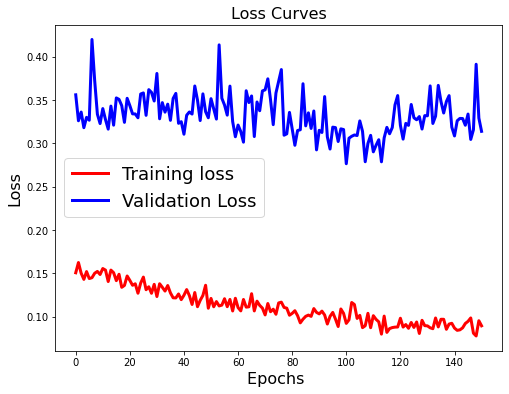

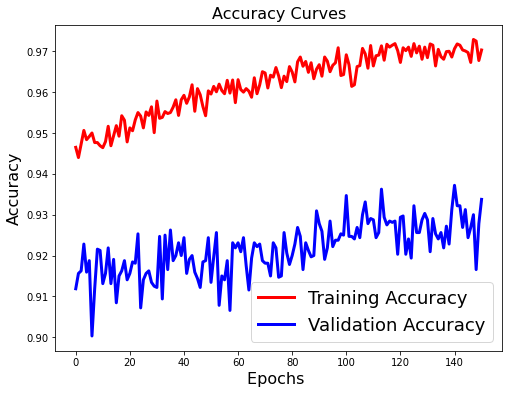

In [ ]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
scores = model.evaluate(val_image, val_label)
print("%s: %.2f%%" % (model.metrics_names[2], scores[1]*100))

100/100 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.9337 - f1_m: 0.9344 - precision_m: 0.9383 - recall_m: 0.9306
f1_m: 93.37%


In [ ]:
test_img_dir = './gdrive/My Drive/data/NIPA_test/'

In [ ]:
def preprocess_img(test_img_list, test_img_dir):
    test_img_tensor_array = []
    for images in tqdm_notebook(test_img_list):
        image_path = os.path.join(test_img_dir, images)
        img = image.load_img(image_path, target_size=(32,32))
        image_tensor = image.img_to_array(img)

        img_tensor = np.expand_dims(image_tensor, axis=0)
        img_tensor /= 255.
        
        test_img_tensor_array.append(img_tensor)
        
    return test_img_tensor_array
    
test_image_tesnsor = preprocess_img(test_tsv[0], test_img_dir)

In [ ]:
test_image = np.squeeze(test_image_tesnsor)
test_image.shape

(3997, 32, 32, 3)

In [ ]:
predictions = model.predict(test_image)
predictions

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.7605532e-26, 1.0071316e-34, 9.9947149e-01, ..., 2.1417220e-14,
        5.9124372e-06, 3.2683396e-22],
       ...,
       [3.7428478e-23, 0.0000000e+00, 1.3982151e-09, ..., 9.9927539e-01,
        2.0792388e-08, 1.4723693e-08],
       [0.0000000e+00, 0.0000000e+00, 2.6499676e-13, ..., 4.1793553e-22,
        1.0000000e+00, 3.7184161e-29],
       [1.0522109e-34, 0.0000000e+00, 0.0000000e+00, ..., 2.5894453e-13,
        2.0901343e-30, 1.0000000e+00]], dtype=float32)

In [ ]:
result = [np.argmax(value) for value in predictions]

In [ ]:
result_df = test_tsv.copy()
result_df

,0
0,0.jpg
1,1.jpg
2,2.jpg
3,3.jpg
4,4.jpg
...,...
3992,3992.jpg
3993,3993.jpg
3994,3994.jpg
3995,3995.jpg


In [ ]:
result_df['pred_class'] = result
result_df

,0,pred_class
0,0.jpg,0
1,1.jpg,1
2,2.jpg,2
3,3.jpg,3
4,4.jpg,4
...,...,...
3992,3992.jpg,15
3993,3993.jpg,16
3994,3994.jpg,17
3995,3995.jpg,18


In [ ]:
result_df['Plant'] = 'Na'
result_df['Disease'] = 'Na'

def devide_class(df):
  ind = df[df['pred_class'] == 0].index
  df['Plant'].loc[ind] = 3
  df['Disease'].loc[ind] = 5

  ind = df[df['pred_class'] == 1].index
  df['Plant'].loc[ind] = 3
  df['Disease'].loc[ind] = 20

  ind = df[df['pred_class'] == 2].index
  df['Plant'].loc[ind] = 4
  df['Disease'].loc[ind] = 2

  ind = df[df['pred_class'] == 3].index
  df['Plant'].loc[ind] = 4
  df['Disease'].loc[ind] = 7
  
  ind = df[df['pred_class'] == 4].index
  df['Plant'].loc[ind] = 4
  df['Disease'].loc[ind] = 11

  ind = df[df['pred_class'] == 5].index
  df['Plant'].loc[ind] = 5
  df['Disease'].loc[ind] = 8

  ind = df[df['pred_class'] == 6].index
  df['Plant'].loc[ind] = 7
  df['Disease'].loc[ind] = 1

  ind = df[df['pred_class'] == 7].index
  df['Plant'].loc[ind] = 7
  df['Disease'].loc[ind] = 20

  ind = df[df['pred_class'] == 8].index
  df['Plant'].loc[ind] = 8
  df['Disease'].loc[ind] = 6

  ind = df[df['pred_class'] == 9].index
  df['Plant'].loc[ind] = 8
  df['Disease'].loc[ind] = 9

  ind = df[df['pred_class'] == 10].index
  df['Plant'].loc[ind] = 10
  df['Disease'].loc[ind] = 20

  ind = df[df['pred_class'] == 11].index
  df['Plant'].loc[ind] = 11
  df['Disease'].loc[ind] = 14

  ind = df[df['pred_class'] == 12].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 1

  ind = df[df['pred_class'] == 13].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 6

  ind = df[df['pred_class'] == 14].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 9

  ind = df[df['pred_class'] == 15].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 15

  ind = df[df['pred_class'] == 16].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 16

  ind = df[df['pred_class'] == 17].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 17

  ind = df[df['pred_class'] == 18].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 18

  ind = df[df['pred_class'] == 19].index
  df['Plant'].loc[ind] = 13
  df['Disease'].loc[ind] = 20

  return df

result_df = devide_class(result_df)
result_df.drop('pred_class', axis=1, inplace=True)
result_df

,0,Plant,Disease
0,0.jpg,3,5
1,1.jpg,3,20
2,2.jpg,4,2
3,3.jpg,4,7
4,4.jpg,4,11
...,...,...,...
3992,3992.jpg,13,15
3993,3993.jpg,13,16
3994,3994.jpg,13,17
3995,3995.jpg,13,18


In [ ]:
result_df.to_csv('NIPA_img_clf_result.csv', header=False, index=False, sep='\t')